# Predict ETA (Clear)

In [2]:
# Python required libraries
#----------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

# Loading Clear Data

In [3]:
# Loading data(1 month data)
#-------------------
df_CSV = pd.read_csv('../CSV/Prism/prism_clear.csv')

In [4]:
# Checking data
#-----------------
print("Total clear observations = ", df_CSV.shape[0])
df_CSV.head(3)

Total clear observations =  730496


,ScreeningID,IFN_ID,State,County,ScreeningQualifier,ScreeningType,StartDateTime,PublishDateTime,ResultStatus,Vendor,State-County,ETA
0,6DBE2AEE-2452-4046-8130-0BB1C10EB334,82902588,ok,pottawatomie,county,criminal,2019-03-30 19:07:57.053,2019-03-30 19:09:03.137,clear,fdi_ok_mc_odcr_smd,ok_pottawatomie,1
1,A9F22C36-5C6B-4922-A583-6CCEC535B8B6,151553713,ca,nevada,county,criminal,2019-03-30 14:28:58.713,2019-03-30 14:50:43.620,clear,qc_ca_nevada,ca_nevada,21
2,9E944AFF-DAE3-440D-847C-6EA23B57FB7A,82901164,va,montgomery,county,criminal,2019-03-30 14:57:52.850,2019-03-30 15:03:55.363,clear,fdi_va_mc_rcx,va_montgomery,6


# ETA Analysis of ALL (Clear Requests)

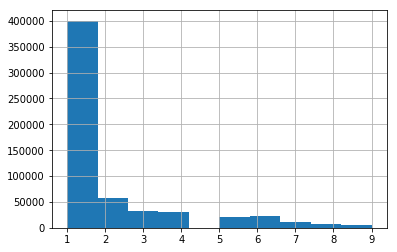

In [5]:
# PLoting hist of ETA less than 10
# Outcome: More than half of requests have an ETA less than 1 min.
#-----------------------------------
df_CSV[df_CSV['ETA'] < 10]['ETA'].hist()

In [6]:
# Creating percentile of ETA( Clear )
#-------------------------

print("min = ", df_CSV["ETA"].min())
print("max = ", df_CSV["ETA"].max())
print("---------------")

def percentile_show(x):
    for per in x:
        print(per,"   -",np.round(np.percentile(df_CSV["ETA"],per),2))
        pass
    pass


x = [10,20,30,40,50,60,70,80,90,91, 92, 93, 94, 95,96,97,98,99,100]
percentile_show(x)


min =  1
max =  8668
---------------
10    - 1.0
20    - 1.0
30    - 1.0
40    - 1.0
50    - 1.0
60    - 2.0
70    - 4.0
80    - 9.0
90    - 52.0
91    - 64.0
92    - 90.0
93    - 124.0
94    - 170.0
95    - 246.0
96    - 397.0
97    - 528.0
98    - 649.0
99    - 926.0
100    - 8668.0


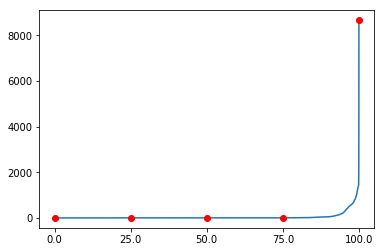

In [7]:
# PLoting ETA (Total) percentile
#-----------------------------------

#d = np.sort(df_CSV["ETA"]).cumsum()
d = np.sort(df_CSV["ETA"])

#print("d = ", d)
# Percentile values
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])

perc = mlab.prctile(d, p=p)

plt.plot(d)
# Place red dots on the percentiles
plt.plot((len(d)-1) * p/100., perc, 'ro')

# Set tick locations and labels
plt.xticks((len(d)-1) * p/100., map(str, p))

plt.show()

# Group By State-County

In [8]:
# Split clear data state-county wise
#------------------------------------------

#df_CSV.groupby(['State','State-County'])['ETA'].mean()

df_Group_State = df_CSV.groupby(['State','County', 'State-County'])

df_Group_State

In [9]:
# Get Statistics of each state-county ETA
#----------------------------------------------
import math

# ETA Mean -------
ETA_Mean = round(df_Group_State['ETA'].mean())
#print("ETA_Mean.shape = ", ETA_Mean.shape)

# ETA Median -------
ETA_Median = round(df_Group_State['ETA'].median())

# ETA Kurt --------
#ETA_Kurt = df_Group_State['ETA'].apply(pd.DataFrame.kurt)

# Eta Skew-------
ETA_Skew = df_Group_State['ETA'].apply(pd.DataFrame.skew)

# Eta Count------
ETA_Count = df_Group_State['ETA'].count()

# ETA Max --------
ETA_Max = round(df_Group_State['ETA'].max())


# ETA Percentile (25%)--------
ETA_Quantile_25 = round(df_Group_State["ETA"].quantile(0.25))


# ETA Percentile (75%)--------
ETA_Quantile_75 = round(df_Group_State["ETA"].quantile(0.75))

# ETA Percentile (80%)--------
ETA_Quantile_80 = round(df_Group_State["ETA"].quantile(0.80))

# ETA Percentile (90%)--------
ETA_Quantile_90 = round(df_Group_State["ETA"].quantile(0.90))

# ETA Percentile (95%)--------
ETA_Quantile_95 = round(df_Group_State["ETA"].quantile(0.95))
#print("ETA_Quantile.shape = ", ETA_Quantile.shape)

# ETA Percentile (99%)--------
ETA_Quantile_99 = round(df_Group_State["ETA"].quantile(0.99))
#print("ETA_Quantile.shape = ", ETA_Quantile.shape)

# ETA IQR (Interquartile Range)-------
ETA_IQR = round((ETA_Quantile_75 - ETA_Quantile_25)*1.5)
#ETA_IQR

# Lower and Upper Outliers--------

ETA_LowerOutlier = ETA_Quantile_25 - ETA_IQR
ETA_LowerOutlier = ETA_LowerOutlier.apply(lambda x: 0 if x < 0 else x)

ETA_UpperOutlier = ETA_Quantile_75 + ETA_IQR
#ETA_LowerOutlier = ETA_UpperOutlier.apply(lambda x: 0 if x >= ETA_Max else x)



print("Total State-county counts= ", ETA_Mean.shape[0])

Total State-county counts=  1703


In [10]:

ETA_STD = df_Group_State['ETA'].std()

ETA_STD

State  County                State-County           
ak     aleutians east        ak_aleutians east            5.692286
       aleutians west        ak_aleutians west            2.042999
       anchorage             ak_anchorage                 3.543797
       fairbanks north star  ak_fairbanks north star      4.420825
       juneau                ak_juneau                    3.551736
       kenai peninsula       ak_kenai peninsula           2.658574
       ketchikan gateway     ak_ketchikan gateway         4.884270
       kodiak island         ak_kodiak island             3.529185
       matanuska susitna     ak_matanuska susitna         4.773398
       north slope           ak_north slope               2.887906
       sitka                 ak_sitka                     3.663124
       valdez cordova        ak_valdez cordova            1.043185
al     autauga               al_autauga                 194.478861
       baldwin               al_baldwin                 183.638978
       ba

In [11]:
# Calculate Mode of ETA and Mode Count
#--------------------------------------
def CalculateMode(x):
    #print(x)
    #maxValue = x.value_counts().max()
    idValue = x.value_counts().idxmax()
    #print("maxValue", maxValue)
    #print("idValue", idValue)
    #print("--------")
    #print(x.value_counts())
    return idValue

def CalculateModeValueCount(x):

    maxValue = x.value_counts().max()
    return maxValue

# ETA Mode -------
ETA_Mode = df_Group_State['ETA'].apply(lambda x: CalculateMode(x))

# ETA Mode Value Count -------
ETA_Mode_Count = df_Group_State['ETA'].apply(lambda x: CalculateModeValueCount(x))


ETA_ModePercentage = (ETA_Mode_Count/ETA_Count)*100
#ETA_ModePercentage

In [12]:
# Calculate count percentage of outliers
# Percentage of request counts above 'Upper Quartile Range' and below 'Below Quartile Range'
#-----------------------------------------------------------------------------------------

def CalculateIQRPercentile(x, isUpper):
    
    quant75 = x.quantile(0.75)
    quant25 = x.quantile(0.25)
    
    ETA_IQR = round((quant75 - quant25)*1.5)
    
    UpperIQR = quant75 + ETA_IQR
    LowerIQR = quant25 - ETA_IQR
    
    if isUpper== True:
        y = x[x > UpperIQR]
    else:
        y = x[x < LowerIQR]
        
    count = y.shape[0]
    count1 = x.shape[0]
    percent = (count/count1)*100
    #print(y.shape[0])
    return percent

# ETA percentile count -------
ETA_UpperOutlierPercentage = df_Group_State['ETA'].apply(lambda x: CalculateIQRPercentile(x, True))
ETA_LowerOutlierPercentage = df_Group_State['ETA'].apply(lambda x: CalculateIQRPercentile(x, False))


In [13]:
# Creating a DataFrame of all unique Groups (State and County) and their findings
#---------------------------------------------------------
df_County_ETA = pd.DataFrame(df_Group_State.size().reset_index(name = "Count"))

#print("ETA_Mean = ", type(ETA_Mean))

# Adding Mean, Max and Quantile to dataframe-----
df_County_ETA['Mean'] = ETA_Mean.values

df_County_ETA['Median'] = ETA_Median.values

#df_County_ETA['Skew'] = df_County_ETA['Mean'] - df_County_ETA['Median'] 

df_County_ETA['Skew'] =  ETA_Skew.values

df_County_ETA['Mode'] = ETA_Mode.values

df_County_ETA['ModeCount'] = ETA_Mode_Count.values

df_County_ETA['ModePercentage'] = ETA_ModePercentage.values

df_County_ETA['Max'] = ETA_Max.values

df_County_ETA['Quant_25'] = ETA_Quantile_25.values

df_County_ETA['Quant_75'] = ETA_Quantile_75.values

df_County_ETA['Quant_80'] = ETA_Quantile_80.values

df_County_ETA['Quant_90'] = ETA_Quantile_90.values

df_County_ETA['Quant_95'] = ETA_Quantile_95.values

df_County_ETA['Quant_99'] = ETA_Quantile_99.values

df_County_ETA['IQR'] = ETA_IQR.values

df_County_ETA['LowerOutlier'] = ETA_LowerOutlier.values

df_County_ETA['LowerOutlierPercentage'] = ETA_LowerOutlierPercentage.values

df_County_ETA['UpperOutlier'] = ETA_UpperOutlier.values

df_County_ETA['UpperOutlierPercentage'] = ETA_UpperOutlierPercentage.values



In [14]:
# df_County_ETA.head()

In [15]:
# Skew Data Details
#--------------------
dfSkew_Perfect = df_County_ETA[df_County_ETA['Skew'] == 0]

dfSkew_Left = df_County_ETA[df_County_ETA['Skew']<0]

dfSkew_Right = df_County_ETA[df_County_ETA['Skew']>0]


from tabulate import tabulate
print(tabulate([['Zero', dfSkew_Perfect.shape[0]], ['Greater', dfSkew_Right.shape[0]], ['lesser', dfSkew_Left.shape[0]], ['Total', df_County_ETA.shape[0]]], headers=['Skew', 'Value']))


Skew       Value
-------  -------
Zero           2
Greater     1643
lesser        58
Total       1703


# Statistical Calculations Analysis

In [16]:
# Creating a new Dataframe

df_Calculated_ETA = pd.DataFrame()

In [17]:
df_County_ETA.shape

df_County_ETA.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,...,Quant_75,Quant_80,Quant_90,Quant_95,Quant_99,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
0,ak,aleutians east,ak_aleutians east,28,3.0,1.0,3.338716,1,21,75.000000,...,2.0,5.0,10.0,10.0,23.0,2.0,0.0,0.0,4.0,25.000000
1,ak,aleutians west,ak_aleutians west,26,2.0,1.0,3.401798,1,24,92.307692,...,1.0,1.0,1.0,6.0,9.0,0.0,1.0,0.0,1.0,7.692308
2,ak,anchorage,ak_anchorage,786,2.0,1.0,4.634576,1,577,73.409669,...,2.0,2.0,5.0,7.0,22.0,2.0,0.0,0.0,4.0,12.213740
3,ak,fairbanks north star,ak_fairbanks north star,332,3.0,1.0,4.338389,1,243,73.192771,...,2.0,3.0,6.0,8.0,28.0,2.0,0.0,0.0,4.0,13.855422
4,ak,juneau,ak_juneau,72,3.0,1.0,2.651252,1,50,69.444444,...,2.0,4.0,7.0,10.0,16.0,2.0,0.0,0.0,4.0,18.055556


In [18]:
df_County_ETA_Mean = df_County_ETA

# Perfect Data

In [19]:
# Perfect Data
#---------------

dfSkew_Perfect.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,...,Quant_75,Quant_80,Quant_90,Quant_95,Quant_99,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
405,il,alexander,il_alexander,12,1.0,1.0,0.0,1,12,100.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1463,ut,carbon,ut_carbon,30,1.0,1.0,0.0,1,30,100.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [20]:
# Taking Mean ETA for perfect data
#-----------------------------------------
df_Skew = df_County_ETA_Mean[df_County_ETA['Skew'] == 0]
#df_Calculated_ETA = df_Skew
df_Calculated_ETA = df_Calculated_ETA.append(df_Skew[['State', 'County', 'State-County', 'Mean']], sort=False)

#print("State-county having perfect data = ", df_Skew.shape[0])

#Excluding all the perfect data now----
df_County_ETA_Mean = df_County_ETA_Mean[df_County_ETA['Skew'] != 0]
df_County_ETA_Mean.shape
#print("State-county having outliers = ", df_County_ETA_Mean.shape[0])

(1701, 22)

In [21]:
print(tabulate([['Cleaned', df_Calculated_ETA.shape[0]], ['Remainig', df_County_ETA_Mean.shape[0]]], headers=['Name', 'Count']))


Name        Count
--------  -------
Cleaned         2
Remainig     1701


# Mode count values with greater than 80%

In [22]:
# Taking Mode, if Mode value count is above 80%
#-------------------------
df_Mode = df_County_ETA_Mean[df_County_ETA_Mean['ModePercentage'] >= 80]

print("State-county having mode greater than 80%  = ", df_Mode.shape[0])

df_Calculated_ETA = df_Calculated_ETA.append(df_Mode[['State', 'County', 'State-County', 'Mean']], sort=False)


#Excluding all the perfect data now----
df_County_ETA_Mean = df_County_ETA_Mean[df_County_ETA['ModePercentage'] < 80]

State-county having mode greater than 80%  =  199


In [23]:
df_Mode.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,...,Quant_75,Quant_80,Quant_90,Quant_95,Quant_99,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
1,ak,aleutians west,ak_aleutians west,26,2.0,1.0,3.401798,1,24,92.307692,...,1.0,1.0,1.0,6.0,9.0,0.0,1.0,0.0,1.0,7.692308
7,ak,kodiak island,ak_kodiak island,43,2.0,1.0,5.127440,1,40,93.023256,...,1.0,1.0,1.0,4.0,17.0,0.0,1.0,0.0,1.0,6.976744
10,ak,sitka,ak_sitka,24,2.0,1.0,4.833235,1,20,83.333333,...,1.0,1.0,2.0,2.0,15.0,0.0,1.0,0.0,1.0,16.666667
88,az,cochise,az_cochise,477,2.0,1.0,3.993535,1,382,80.083857,...,1.0,1.0,4.0,6.0,14.0,0.0,1.0,0.0,1.0,19.916143
90,az,gila,az_gila,188,1.0,1.0,2.716956,1,152,80.851064,...,1.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,1.0,19.148936


In [24]:
print(tabulate([['Cleaned', df_Calculated_ETA.shape[0]], ['Remainig', df_County_ETA_Mean.shape[0]]], headers=['Name', 'Count']))


Name        Count
--------  -------
Cleaned       201
Remainig     1502


# Right Skew

In [25]:
dfSkew_Right.head()

,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,...,Quant_75,Quant_80,Quant_90,Quant_95,Quant_99,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
0,ak,aleutians east,ak_aleutians east,28,3.0,1.0,3.338716,1,21,75.000000,...,2.0,5.0,10.0,10.0,23.0,2.0,0.0,0.0,4.0,25.000000
1,ak,aleutians west,ak_aleutians west,26,2.0,1.0,3.401798,1,24,92.307692,...,1.0,1.0,1.0,6.0,9.0,0.0,1.0,0.0,1.0,7.692308
2,ak,anchorage,ak_anchorage,786,2.0,1.0,4.634576,1,577,73.409669,...,2.0,2.0,5.0,7.0,22.0,2.0,0.0,0.0,4.0,12.213740
3,ak,fairbanks north star,ak_fairbanks north star,332,3.0,1.0,4.338389,1,243,73.192771,...,2.0,3.0,6.0,8.0,28.0,2.0,0.0,0.0,4.0,13.855422
4,ak,juneau,ak_juneau,72,3.0,1.0,2.651252,1,50,69.444444,...,2.0,4.0,7.0,10.0,16.0,2.0,0.0,0.0,4.0,18.055556


In [26]:
# Remove the upper outliers if their count is less than 20%
# Replace their mean with new mean/Median
#----------------------
df_County_ETA_RightSkew = df_County_ETA_Mean[(df_County_ETA_Mean['UpperOutlierPercentage']  <=  20) & (df_County_ETA_Mean['Skew'] > 0)]
df_County_ETA_RightSkew.shape

print("State-County with 75 percentile as perfect data = ", df_County_ETA_RightSkew.shape[0])

#Excluding all the perfect data now----
#df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_RightSkew]).drop_duplicates(keep=False)
#df_County_ETA_Mean.shape


State-County with 75 percentile as perfect data =  1094


In [27]:
# Removing the value above 75 percentile(Right Skew) from original Data
#-----------------------------------------------------------------------
df_CSV_Right = df_CSV[(df_CSV['State-County'].isin(df_County_ETA_RightSkew['State-County']))]


df_Group_State_Right = df_CSV_Right.groupby(['State','County', 'State-County'])

# Calculate Mean of ETA 
#--------------------------------------
def CalculateNewMean(x):

    upperLimit = x.quantile(.75)
    x = x[x <= upperLimit]
    
    return round(x.mean())

# ETA Mean -------
ETA_NewMean = df_Group_State_Right['ETA'].apply(lambda x: CalculateNewMean(x))


In [28]:
df_County_ETA_Right = pd.DataFrame(df_Group_State_Right.size().reset_index(name = "Count"))
df_County_ETA_Right['Mean'] = ETA_NewMean.values
df_County_ETA_Right.shape

(1094, 5)

In [29]:
df_County_ETA_Right.head(2)

,State,County,State-County,Count,Mean
0,ak,anchorage,ak_anchorage,786,1
1,ak,fairbanks north star,ak_fairbanks north star,332,1


In [30]:
df_Calculated_ETA = df_Calculated_ETA.append(df_County_ETA_Right[['State', 'County', 'State-County', 'Mean']], sort=False)



In [31]:
#Excluding all the perfect data now----
df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_RightSkew]).drop_duplicates(keep=False)
#df_County_ETA_Mean.shape



In [32]:
print(tabulate([['Cleaned', df_Calculated_ETA.shape[0]], ['Remainig', df_County_ETA_Mean.shape[0]]], headers=['Name', 'Count']))


Name        Count
--------  -------
Cleaned      1295
Remainig      408


# Left Skew Data

In [33]:
dfSkew_Left.head()


,State,County,State-County,Count,Mean,Median,Skew,Mode,ModeCount,ModePercentage,...,Quant_75,Quant_80,Quant_90,Quant_95,Quant_99,IQR,LowerOutlier,LowerOutlierPercentage,UpperOutlier,UpperOutlierPercentage
12,al,autauga,al_autauga,159,448.0,479.0,-0.552513,1,6,3.773585,...,598.0,633.0,650.0,679.0,761.0,402.0,0.0,0.000000,1000.0,0.628931
13,al,baldwin,al_baldwin,383,417.0,445.0,-0.477601,1,8,2.088773,...,549.0,580.0,634.0,665.0,749.0,368.0,0.0,0.000000,917.0,0.000000
14,al,barbour,al_barbour,64,411.0,431.0,-0.622066,2,4,6.250000,...,544.0,549.0,586.0,660.0,776.0,345.0,0.0,0.000000,889.0,0.000000
16,al,blount,al_blount,62,443.0,444.0,-0.288189,539,3,4.838710,...,537.0,546.0,634.0,689.0,705.0,279.0,72.0,1.612903,816.0,0.000000
17,al,bullock,al_bullock,24,454.0,460.0,-0.280354,277,2,8.333333,...,603.0,610.0,635.0,646.0,646.0,422.0,0.0,0.000000,1025.0,0.000000


In [34]:
# Remove the upper outliers if their count is less than 20%
# Replace their mean with new mean/Median
#----------------------
df_County_ETA_LeftSkew = df_County_ETA_Mean[(df_County_ETA_Mean['LowerOutlierPercentage']  <=  20) & (df_County_ETA_Mean['Skew'] < 0)]
df_County_ETA_LeftSkew.shape

print("State-County with 75 percentile as perfect data = ", df_County_ETA_LeftSkew.shape[0])

#Excluding all the perfect data now----
#df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_LeftSkew]).drop_duplicates(keep=False)



State-County with 75 percentile as perfect data =  58


In [35]:
# Removing the value below 25 percentile(Left Skew) from original Data
#-----------------------------------------------------------------------
df_CSV_Left = df_CSV[(df_CSV['State-County'].isin(df_County_ETA_LeftSkew['State-County']))]


df_Group_State_Left = df_CSV_Left.groupby(['State','County', 'State-County'])

# Calculate Mode of ETA and Mode Count
#--------------------------------------
def CalculateNewMean(x):

    lowerLimit = x.quantile(.25)
    x = x[x >= lowerLimit]
    
    return round(x.mean())

# ETA Mode -------
ETA_NewMean = df_Group_State_Left['ETA'].apply(lambda x: CalculateNewMean(x))


In [36]:
df_County_ETA_Left = pd.DataFrame(df_Group_State_Left.size().reset_index(name = "Count"))
df_County_ETA_Left['Mean'] = ETA_NewMean.values
df_County_ETA_Left.shape

(58, 5)

In [37]:
df_County_ETA_Left.head(2)

,State,County,State-County,Count,Mean
0,al,autauga,al_autauga,159,534
1,al,baldwin,al_baldwin,383,500


In [38]:
# Appending To clean List
#---------------------------

df_Calculated_ETA = df_Calculated_ETA.append(df_County_ETA_Left[['State', 'County', 'State-County', 'Mean']], sort=False)


In [39]:
#Excluding all the perfect data now----
df_County_ETA_Mean = pd.concat([df_County_ETA_Mean, df_County_ETA_LeftSkew]).drop_duplicates(keep=False)
#df_County_ETA_Mean.shape

In [40]:
print(tabulate([['Cleaned', df_Calculated_ETA.shape[0]], ['Remainig', df_County_ETA_Mean.shape[0]]], headers=['Name', 'Count']))


Name        Count
--------  -------
Cleaned      1353
Remainig      350


# Remaining Data (percentile)

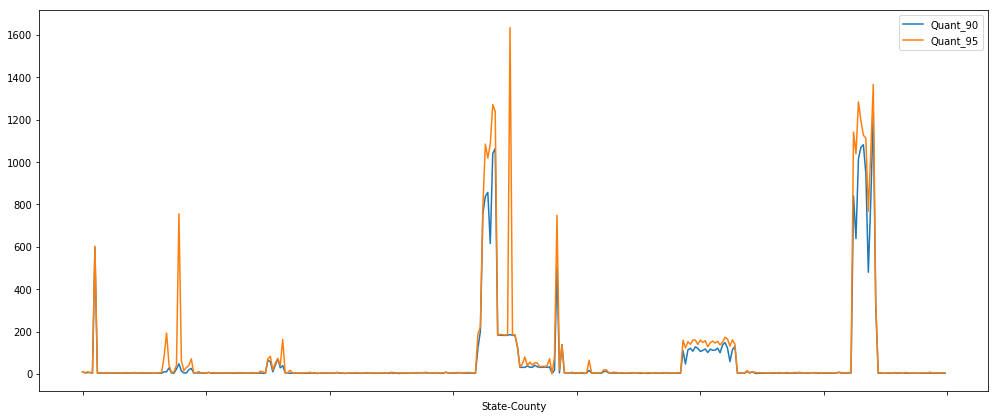

In [41]:
df_County_ETA_Mean.plot(x='State-County', y=['Quant_90','Quant_95'], figsize=(17,7))

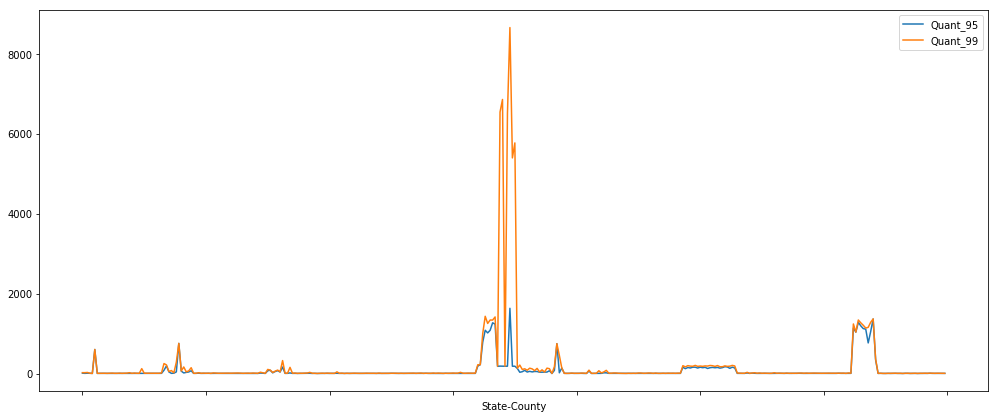

In [42]:
df_County_ETA_Mean.plot(x='State-County', y=['Quant_95','Quant_99'], figsize=(17,7))

In [43]:
# Remainig right skew data, remove the values above 90 percentile
#-----------------------------------------------------------------------
df_CSV_Right = df_CSV[(df_CSV['State-County'].isin(df_County_ETA_Mean['State-County']))]


df_Group_State_Right = df_CSV_Right.groupby(['State','County', 'State-County'])

# Calculate Mode of ETA and Mode Count
#--------------------------------------
def CalculateNewMean(x):

    upperLimit = x.quantile(.90)
    x = x[x <= upperLimit]
    
    return round(x.mean())

# ETA Mode -------
ETA_NewMean = df_Group_State_Right['ETA'].apply(lambda x: CalculateNewMean(x))


In [44]:
df_County_ETA_Right = pd.DataFrame(df_Group_State_Right.size().reset_index(name = "Count"))
df_County_ETA_Right['Mean'] = ETA_NewMean.values
df_County_ETA_Right.shape

(350, 5)

In [45]:
df_Calculated_ETA = df_Calculated_ETA.append(df_County_ETA_Right[['State', 'County', 'State-County', 'Mean']], sort=False)


In [49]:
df_County_ETA_Right['State-County']

0         ak_aleutians east
1      ak_ketchikan gateway
2      ak_matanuska susitna
3            ak_north slope
4         ak_valdez cordova
5                al_conecuh
6               ar_faulkner
7                ar_garland
8                 az_apache
9               az_coconino
10                az_la paz
11              az_maricopa
12                az_mohave
13                az_navajo
14                 az_pinal
15               az_yavapai
16                  az_yuma
17               ca_alameda
18                 ca_butte
19             ca_calaveras
20                ca_colusa
21                 ca_kings
22                 ca_marin
23                ca_merced
24             ca_riverside
25            ca_sacramento
26             ca_san diego
27         ca_santa barbara
28                ca_shasta
29              ca_siskiyou
               ...         
320          va_norton city
321             wa_san juan
322              wi_ashland
323                wi_brown
324              wi_

In [48]:
df_County_ETA_Mean['State-County']

0          ak_aleutians east
6       ak_ketchikan gateway
8       ak_matanuska susitna
9             ak_north slope
11         ak_valdez cordova
29                al_conecuh
80               ar_faulkner
81                ar_garland
87                 az_apache
89               az_coconino
92                 az_la paz
93               az_maricopa
94                 az_mohave
95                 az_navajo
97                  az_pinal
99                az_yavapai
100                  az_yuma
101               ca_alameda
103                 ca_butte
104             ca_calaveras
105                ca_colusa
110                 ca_kings
113                 ca_marin
115                ca_merced
121             ca_riverside
122            ca_sacramento
124             ca_san diego
127         ca_santa barbara
130                ca_shasta
131              ca_siskiyou
                ...         
1560          va_norton city
1625             wa_san juan
1637              wi_ashland
1640          

In [63]:
#Excluding all the perfect data now----
df_County_ETA_Mean = pd.concat([df_County_ETA_Mean[['State', 'County', 'State-County']], df_County_ETA_Right]).drop_duplicates(keep=False).reset_index(drop=True)
df_County_ETA_Mean.shape

#pandas.concat([df1,df2]).drop_duplicates().reset_index(drop=True)
# df_tot = pd.concat([df_1,df_2], ignore_index=False)

(700, 5)

In [62]:
df_County_ETA_Mean['State-County']

0         ak_aleutians east
1      ak_ketchikan gateway
2      ak_matanuska susitna
3            ak_north slope
4         ak_valdez cordova
5                al_conecuh
6               ar_faulkner
7                ar_garland
8                 az_apache
9               az_coconino
10                az_la paz
11              az_maricopa
12                az_mohave
13                az_navajo
14                 az_pinal
15               az_yavapai
16                  az_yuma
17               ca_alameda
18                 ca_butte
19             ca_calaveras
20                ca_colusa
21                 ca_kings
22                 ca_marin
23                ca_merced
24             ca_riverside
25            ca_sacramento
26             ca_san diego
27         ca_santa barbara
28                ca_shasta
29              ca_siskiyou
               ...         
670          va_norton city
671             wa_san juan
672              wi_ashland
673                wi_brown
674              wi_

In [60]:
print(tabulate([['Cleaned', df_Calculated_ETA.shape[0]], ['Remainig', df_County_ETA_Mean.shape[0]]], headers=['Name', 'Count']))




Name        Count
--------  -------
Cleaned      1703
Remainig      700


# Save The Results in State-County Excel

In [439]:
df_Results = pd.read_csv('../CSV/Prism/Output/prism.csv')

df_Results.head()

,State,County,Abbr,State-County,Mean
0,alabama,autauga,al,al_autauga,534.0
1,alabama,baldwin,al,al_baldwin,500.0
2,alabama,barbour,al,al_barbour,493.0
3,alabama,bibb,al,al_bibb,335.0
4,alabama,blount,al,al_blount,506.0


In [440]:
df_Calculated_ETA = df_Calculated_ETA[['State-County', 'Mean']]

df_Calculated_ETA = df_Calculated_ETA.rename(columns={'Mean': 'ClearETA'})

In [441]:
df_Results_new = df_Results.merge(df_Calculated_ETA, on="State-County", how="left")


In [442]:
df_Results_new.head()

,State,County,Abbr,State-County,Mean,ClearETA
0,alabama,autauga,al,al_autauga,534.0,534.0
1,alabama,baldwin,al,al_baldwin,500.0,500.0
2,alabama,barbour,al,al_barbour,493.0,493.0
3,alabama,bibb,al,al_bibb,335.0,335.0
4,alabama,blount,al,al_blount,506.0,506.0


In [443]:
df_Results_new.to_csv('../CSV/Prism/Output/prism.csv', index=False)